In [53]:
import adlfs
import fsspec
import xarray as xr

import dask_gateway
cluster = dask_gateway.GatewayCluster()
client = cluster.get_client()
cluster.scale(4)
cluster

In [2]:
#cluster.close()

In [17]:
store = fsspec.get_mapper('az://daymet-zarr/daily/hi.zarr', account_name="daymeteuwest")
ds = xr.open_zarr(store, consolidated=True)
ds

<xarray.Dataset>
Dimensions:                  (nv: 2, time: 14600, x: 284, y: 584)
Coordinates:
    lat                      (y, x) float32 dask.array<chunksize=(292, 284), meta=np.ndarray>
    lon                      (y, x) float32 dask.array<chunksize=(292, 284), meta=np.ndarray>
  * time                     (time) datetime64[ns] 1980-01-01T12:00:00 ... 20...
  * x                        (x) float32 -5.802e+06 -5.801e+06 ... -5.519e+06
  * y                        (y) float32 -3.9e+04 -4e+04 ... -6.21e+05 -6.22e+05
Dimensions without coordinates: nv
Data variables:
    dayl                     (time, y, x) float32 dask.array<chunksize=(365, 584, 284), meta=np.ndarray>
    lambert_conformal_conic  int16 ...
    prcp                     (time, y, x) float32 dask.array<chunksize=(365, 584, 284), meta=np.ndarray>
    srad                     (time, y, x) float32 dask.array<chunksize=(365, 584, 284), meta=np.ndarray>
    swe                      (time, y, x) float32 dask.array<chunksize=(365, 584, 284), meta=np.ndarray>
    time_bnds                (time, nv) datetime64[ns] dask.array<chunksize=(14600, 2), meta=np.ndarray>
    tmax                     (time, y, x) float32 dask.array<chunksize=(365, 584, 284), meta=np.ndarray>
    tmin                     (time, y, x) float32 dask.array<chunksize=(365, 584, 284), meta=np.ndarray>
    vp                       (time, y, x) float32 dask.array<chunksize=(365, 584, 284), meta=np.ndarray>
    yearday                  (time) int16 dask.array<chunksize=(14600,), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.6
    Version_data:      Daymet Data Version 4.0
    Version_software:  Daymet Software Version 4.0
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...
    source:            Daymet Software Version 4.0
    start_year:        [1980]

In [4]:
# (ds.tmax - ds.tmin).sel(time="1980-01-16T12:00:00.000000000").plot()

In [18]:
t = ds.tmax.sel(time="1980-01-16T12:00:00.000000000")
t

<xarray.DataArray 'tmax' (y: 584, x: 284)>
dask.array<getitem, shape=(584, 284), dtype=float32, chunksize=(584, 284), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float32 dask.array<chunksize=(292, 284), meta=np.ndarray>
    lon      (y, x) float32 dask.array<chunksize=(292, 284), meta=np.ndarray>
    time     datetime64[ns] 1980-01-16T12:00:00
  * x        (x) float32 -5.802e+06 -5.801e+06 -5.8e+06 ... -5.52e+06 -5.519e+06
  * y        (y) float32 -3.9e+04 -4e+04 -4.1e+04 ... -6.21e+05 -6.22e+05
Attributes:
    cell_methods:  area: mean time: maximum
    grid_mapping:  lambert_conformal_conic
    long_name:     daily maximum temperature
    units:         degrees C

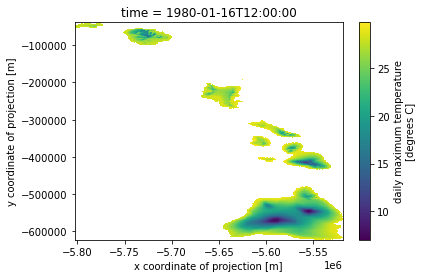

In [19]:
t.plot()

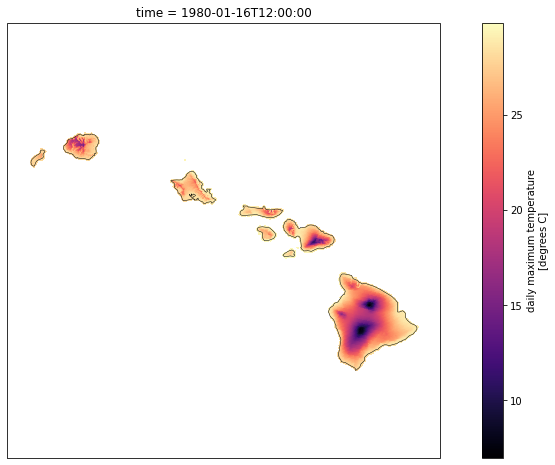

In [20]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

lcc = ds.variables["lambert_conformal_conic"].attrs
prj_kwargs = dict(
    central_latitude=lcc['latitude_of_projection_origin'][0],
    central_longitude=lcc['longitude_of_central_meridian'][0],
    standard_parallels=(lcc["standard_parallel"])
)
prj = ccrs.LambertConformal(**prj_kwargs)

fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.PlateCarree())

t.plot(ax=ax, transform=prj, cmap="magma")
ax.coastlines(linewidth=0.5)
#ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
plt.show()

(584, 284)
(292, 142)


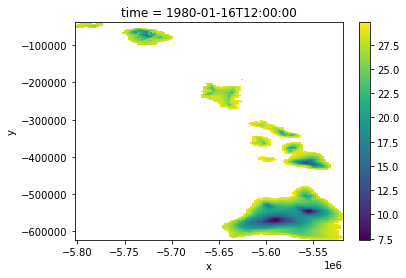

In [27]:
print(t.shape)
factor=2
tc = t.coarsen(dim={'x': factor, 'y': factor}, boundary="trim").mean()
print(tc.shape)
tc.plot()

In [28]:
store = fsspec.get_mapper('az://daymet-zarr/monthly/na.zarr', account_name="daymeteuwest")
ds_na = xr.open_zarr(store, consolidated=True)
ds_na

<xarray.Dataset>
Dimensions:                  (nv: 2, time: 480, x: 7814, y: 8075)
Coordinates:
    lat                      (y, x) float32 dask.array<chunksize=(505, 977), meta=np.ndarray>
    lon                      (y, x) float32 dask.array<chunksize=(505, 977), meta=np.ndarray>
  * time                     (time) datetime64[ns] 1980-01-16T12:00:00 ... 20...
  * x                        (x) float32 -4.56e+06 -4.559e+06 ... 3.253e+06
  * y                        (y) float32 4.984e+06 4.983e+06 ... -3.09e+06
Dimensions without coordinates: nv
Data variables:
    lambert_conformal_conic  int16 ...
    prcp                     (time, y, x) float32 dask.array<chunksize=(12, 1250, 1250), meta=np.ndarray>
    swe                      (time, y, x) float32 dask.array<chunksize=(12, 1250, 1250), meta=np.ndarray>
    time_bnds                (time, nv) datetime64[ns] dask.array<chunksize=(480, 2), meta=np.ndarray>
    tmax                     (time, y, x) float32 dask.array<chunksize=(12, 1250, 1250), meta=np.ndarray>
    tmin                     (time, y, x) float32 dask.array<chunksize=(12, 1250, 1250), meta=np.ndarray>
    vp                       (time, y, x) float32 dask.array<chunksize=(12, 1250, 1250), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.6
    NCO:               netCDF Operators version 4.9.3 (Homepage = http://nco....
    Version_data:      Daymet Data Version 4.0
    Version_software:  Daymet Software Version 4.0
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...
    source:            Daymet Software Version 4.0
    start_year:        [1980]

In [70]:
ds_na.tmax.sel(time="2018-04-16", method="nearest")

<xarray.DataArray 'tmax' (time: 1, y: 8075, x: 7814)>
dask.array<getitem, shape=(1, 8075, 7814), dtype=float32, chunksize=(1, 1250, 1250), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float32 dask.array<chunksize=(505, 977), meta=np.ndarray>
    lon      (y, x) float32 dask.array<chunksize=(505, 977), meta=np.ndarray>
  * time     (time) datetime64[ns] 2018-04-16
  * x        (x) float32 -4.56e+06 -4.559e+06 -4.558e+06 ... 3.252e+06 3.253e+06
  * y        (y) float32 4.984e+06 4.983e+06 4.982e+06 ... -3.089e+06 -3.09e+06
Attributes:
    cell_methods:  area: mean time: maximum within days time: mean over days
    grid_mapping:  lambert_conformal_conic
    long_name:     monthly average of daily maximum temperature
    units:         degrees C

In [108]:
%%time
factor=2
with xr.set_options(keep_attrs=True):
    t_na = ds_na.tmax.sel(time="2018-04-16", method="nearest").coarsen(dim={'x': factor, 'y': factor}, boundary="trim").mean()
    t_na.attrs["units"] = "C"

CPU times: user 25.2 ms, sys: 0 ns, total: 25.2 ms
Wall time: 23.5 ms


In [ ]:
%%time
import cartopy
fig = plt.figure(figsize=(15,8), dpi=100)

ax = plt.axes(projection=prj)
ax.set_extent([-145, -58, 9, 84])
t_na.plot(ax=ax, transform=prj, cmap="gist_ncar", cbar_kwargs={"aspect": 50})

ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, linewidth=0)

countries = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_0_countries', scale="50m", facecolor="none")
states = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale="10m", facecolor="none")
lakes = cartopy.feature.NaturalEarthFeature('physical', 'lakes',
    scale="110m", facecolor=cfeature.COLORS['water'])

ax.add_feature(countries, zorder=2, linewidth=0.3, edgecolor="gray")
ax.add_feature(states, zorder=3, linewidth=0.3, edgecolor="gray")
ax.add_feature(lakes, zorder=4, linewidth=0.3, edgecolor="gray")

CPU times: user 14.6 s, sys: 803 ms, total: 15.4 s
Wall time: 25.9 s
